## Datenalyse: 05 Extremwerttheorie - POT - MLE - 0.0001

Das Ziel ist es, die Wahrscheinlichkeit einer X45 Sonneneruption zu berechnen.

X45: 0.0045000000000000005

In [1]:
import pandas as pd

df = pd.read_csv('new_data_solar_flare/df_extreme.csv', sep=',', index_col=0)

df.describe()

,XRay_class_nr1
count,1.503300e+04
mean,1.425635e-05
std,7.191678e-05
min,0.000000e+00
25%,1.300000e-07
50%,1.400000e-06
75%,7.000000e-06
max,2.800000e-03


In [2]:
from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = percentileofscore(df['XRay_class_nr1'], 0.0001)

print("Der Wert 0.0001 liegt im " + str(percentile) + " Perzentil.")

100-percentile

Der Wert 0.0001 liegt im 97.61192044169493 Perzentil.


2.3880795583050656

In [3]:
from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = percentileofscore(df['XRay_class_nr1'], 0.0045)

print("Der Wert 0.00035 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.00035 liegt im 100.0 Perzentil.


In [4]:
from scipy.stats import percentileofscore
import numpy as np

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = np.percentile(df['XRay_class_nr1'], 81)

print("Der Wert 0.0001 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.0001 liegt im 1e-05 Perzentil.


In [5]:
from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = np.percentile(df['XRay_class_nr1'], 99.55)

print("Der Wert 0.0001 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.0001 liegt im 0.0004 Perzentil.


In [6]:
#import data from the created CSV-file
data = pd.read_csv(
    "new_data_solar_flare/df_extreme.csv",
    index_col=0,
    parse_dates=True,
).squeeze()

data = (
    data
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
   # .loc[pd.to_datetime("1850"):]
)

In [7]:
data.head()

1975-11-05    5.000000e-07
1975-11-06    6.000000e-07
1975-11-07    0.000000e+00
1975-11-08    0.000000e+00
1975-11-09    0.000000e+00
Name: XRay_class_nr1, dtype: float64

### Peaks over Threshold

#### 1. Mean Residual Life Plot

<AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>

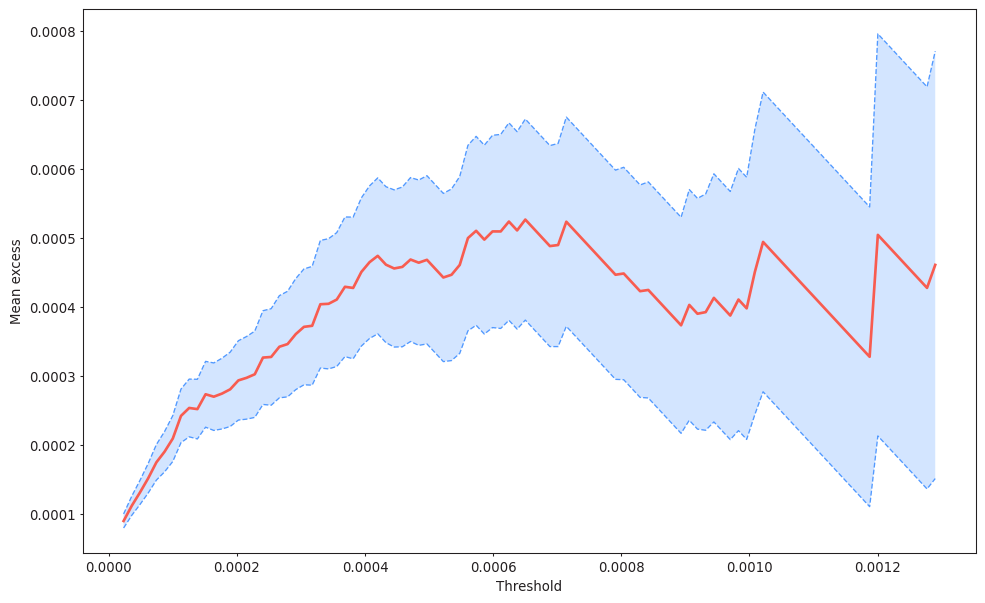

In [8]:
from pyextremes import plot_mean_residual_life
from pyextremes import __version__, get_extremes
from pyextremes.plotting import plot_extremes

plot_mean_residual_life(data, figsize=(12,7.5))

#### 2. Unterstützende Plots zur Findung des Schwellenwerts (Threshold)

(<AxesSubplot:ylabel='Shape, $\\xi$'>,
 <AxesSubplot:xlabel='Threshold', ylabel='Modified scale, $\\sigma^*$'>)

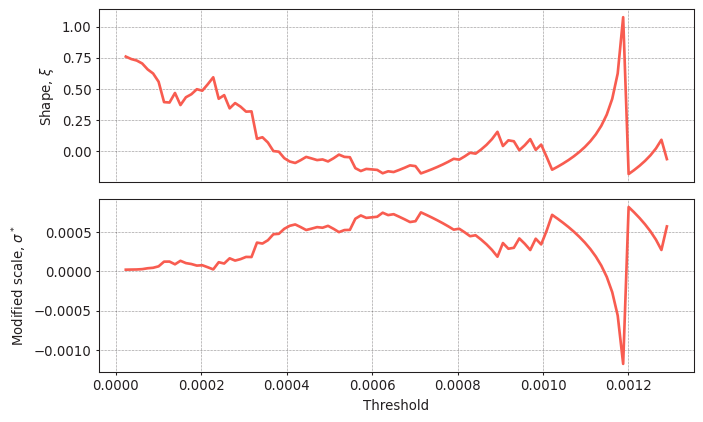

In [9]:
from pyextremes import plot_parameter_stability

plot_parameter_stability(data)

<AxesSubplot:xlabel='Threshold', ylabel='Return value'>

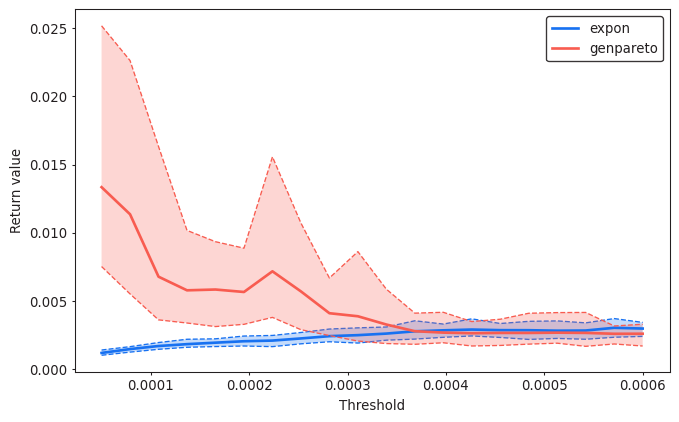

In [10]:
from pyextremes import plot_return_value_stability
import numpy as np

plot_return_value_stability(
    data,
    return_period=100,
    thresholds=np.linspace(0.00005, 0.0006, 20),
    alpha=0.95,
)

<AxesSubplot:xlabel='Threshold', ylabel='Return value'>

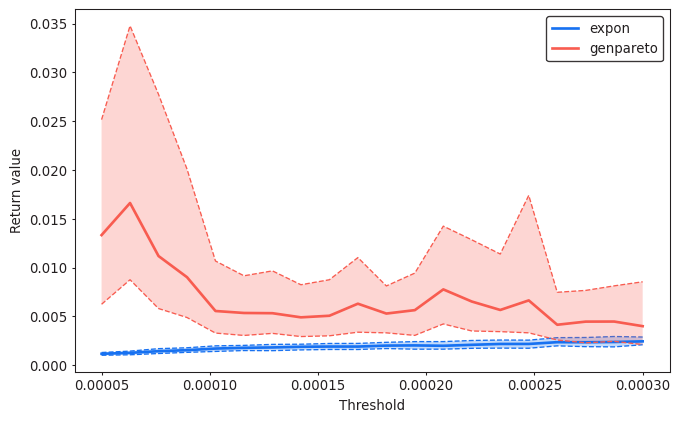

In [11]:
from pyextremes import plot_return_value_stability
import numpy as np

plot_return_value_stability(
    data,
    return_period=100,
    thresholds=np.linspace(0.00005, 0.0003, 20),
    alpha=0.95,
)

(<AxesSubplot:ylabel='Shape, $\\xi$'>,
 <AxesSubplot:ylabel='Modified scale, $\\sigma^*$'>,
 <AxesSubplot:ylabel='Return value'>,
 <AxesSubplot:xlabel='Threshold', ylabel='AIC Score'>)

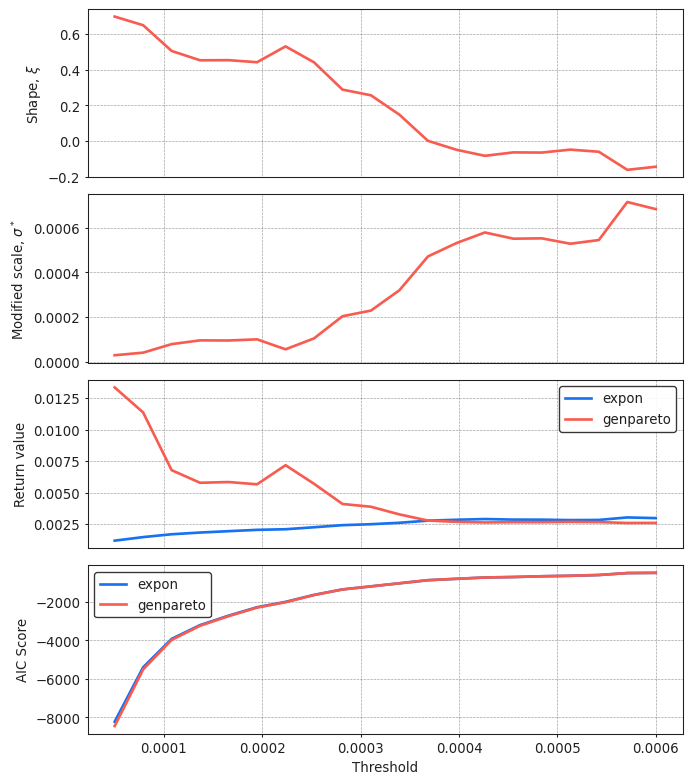

In [12]:
from pyextremes import plot_threshold_stability

plot_threshold_stability(
    data,
    return_period=100,
    thresholds=np.linspace(0.00005, 0.0006, 20)
)

#### 3. Setze Schwellenwert auf 0.0001 und fitte das Model

Text(0, 0.5, 'Intensität Sonneneruption')

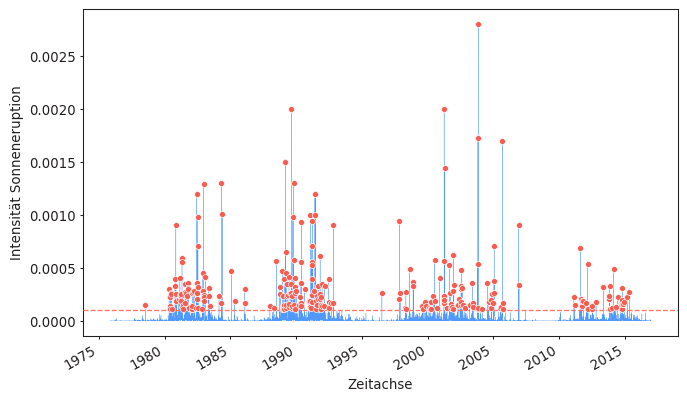

In [13]:
# Referenz: P201

from pyextremes import EVA
import matplotlib.pyplot as plt

pot_model = EVA(data)
pot_model.get_extremes(method="POT", threshold=0.0001)
pot_model.plot_extremes()
plt.xlabel("Zeitachse")
plt.ylabel("Intensität Sonneneruption")

In [14]:
pot_model.fit_model()

#### 4. Validierung des Modells

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='XRay_class_nr1'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='XRay_class_nr1', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

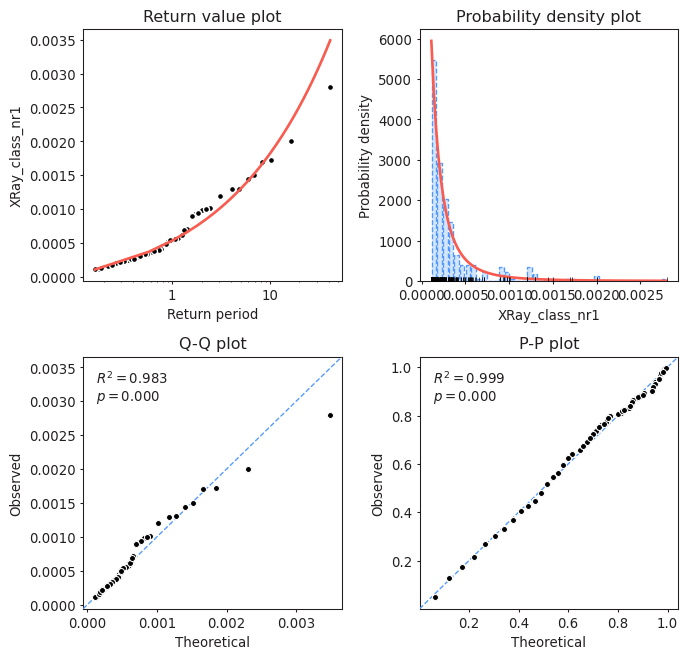

In [15]:
pot_model.plot_diagnostic()

In [16]:
pot_model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                XRay_class_nr1      Size:                              15,033
Start:                      November 1975      End:                        December 2016
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                268      Extraction method:                    POT
Type:                                high      Threshold:                         0.0001
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

### Berechnung der Wahrscheinlichkeit eines Carrington-Ereignisses im Sonnenzyklus 25
Der Sonnenzyklus wird voraussichtlich bis 2030 dauern, also: return_period=7.<br>

Der Sonnensturm aus dem Carrington-Ereignis wurde von einer X45 Sonneneruption ausgelöst. Der Wert einer X45 Klasse ist 0.0045. Der 0.0045 Wert entspricht dem Perzentil 0.997039845672853.

In [27]:
import numpy as np

with np.errstate(invalid='ignore'):
    pot_summary = pot_model.get_summary(
        return_period=[1,7,10, 50, 73.4, 100, 150],
        alpha=0.95,
        n_samples=1000,
    )

In [28]:
print(pot_summary)

               return value  lower ci  upper ci
return period                                  
1.0                0.000535  0.000456  0.000608
7.0                0.001533  0.001171  0.001958
10.0               0.001820  0.001343  0.002385
50.0               0.003799  0.002397  0.005883
73.0               0.004489  0.002722  0.007286
73.4               0.004500  0.002727  0.007308
74.0               0.004516  0.002734  0.007342
74.1               0.004518  0.002735  0.007348
74.2               0.004521  0.002736  0.007353
75.0               0.004542  0.002746  0.007398
100.0              0.005151  0.003020  0.008696
150.0              0.006142  0.003436  0.010913
